- 다음 주제에 대한 EDA/전처리 진행 및 문제 정의
    - **의료 시설 취약 지역 분석** ⭐🌟
    ****감기, 눈병, 식중독, 천식, 피부염, 온열질환, 심뇌혈관 질환에 대한 예측 정보 → 전국 병원 정보와 연계하여 취약 지역 발굴 및 대책 방안 강구
    [국민건강보험공단 질병예측 정보](https://www.data.go.kr/data/15028050/openapi.do)(공공데이터포털) + [건강보험심사평가원_병원정보서비스](https://www.data.go.kr/data/15001698/openapi.do?recommendDataYn=Y)(공공데이터포털)

# 데이터 가져오기 및 정제

In [95]:
import os
import requests
from dotenv import load_dotenv
import pandas as pd

# .env 파일 로드
load_dotenv()

# 인증키 가져오기
encoding_key = os.getenv("240310_DECODING_KEY")

# 데이터를 담을 빈 DataFrame 생성
combined_df = pd.DataFrame()

# API 엔드포인트
url = 'http://apis.data.go.kr/B550928/dissForecastInfoSvc/getDissForecastInfo'

# 수집할 지역 코드 리스트
region_codes = ['11', '26', '27', '28', '29', '30', '31', '41', '42', '43', '44', '45', '46', '47', '48', '49']

# 수집할 질병 코드 리스트
disease_codes = ['1', '2', '3', '5']

# 각 지역 코드와 질병 코드에 대해 데이터 수집
for region_code in region_codes:
    for disease_code in disease_codes:
        # API 호출에 사용할 파라미터 설정
        params = {
            'serviceKey': encoding_key,
            'numOfRows': '1000',
            'pageNo': '1',
            'type': 'json',
            'dissCd': disease_code,
            'znCd': region_code
        }

        # API 호출
        response = requests.get(url, params=params)
        data = response.json()

        # 총 데이터 수 확인
        total_count = data['response']['body']['totalCount']
        print("지역 코드", region_code, "질병 코드", disease_code, "총 데이터 수:", total_count)

        # 'body' 안에 있는 'items' 추출
        items = data['response']['body']['items']

        # DataFrame으로 변환
        df_region_disease = pd.DataFrame(items)

        # 수집한 데이터를 기존 DataFrame에 추가
        combined_df = pd.concat([combined_df, df_region_disease], ignore_index=True)

print("총 데이터 수:", len(combined_df))

# 결과 확인
print(combined_df)


지역 코드 11 질병 코드 1 총 데이터 수: 75
지역 코드 11 질병 코드 2 총 데이터 수: 75
지역 코드 11 질병 코드 3 총 데이터 수: 75
지역 코드 11 질병 코드 5 총 데이터 수: 75
지역 코드 26 질병 코드 1 총 데이터 수: 48
지역 코드 26 질병 코드 2 총 데이터 수: 48
지역 코드 26 질병 코드 3 총 데이터 수: 48
지역 코드 26 질병 코드 5 총 데이터 수: 48
지역 코드 27 질병 코드 1 총 데이터 수: 24
지역 코드 27 질병 코드 2 총 데이터 수: 24
지역 코드 27 질병 코드 3 총 데이터 수: 24
지역 코드 27 질병 코드 5 총 데이터 수: 24
지역 코드 28 질병 코드 1 총 데이터 수: 30
지역 코드 28 질병 코드 2 총 데이터 수: 30
지역 코드 28 질병 코드 3 총 데이터 수: 30
지역 코드 28 질병 코드 5 총 데이터 수: 30
지역 코드 29 질병 코드 1 총 데이터 수: 15
지역 코드 29 질병 코드 2 총 데이터 수: 15
지역 코드 29 질병 코드 3 총 데이터 수: 15
지역 코드 29 질병 코드 5 총 데이터 수: 15
지역 코드 30 질병 코드 1 총 데이터 수: 15
지역 코드 30 질병 코드 2 총 데이터 수: 15
지역 코드 30 질병 코드 3 총 데이터 수: 15
지역 코드 30 질병 코드 5 총 데이터 수: 15
지역 코드 31 질병 코드 1 총 데이터 수: 15
지역 코드 31 질병 코드 2 총 데이터 수: 15
지역 코드 31 질병 코드 3 총 데이터 수: 15
지역 코드 31 질병 코드 5 총 데이터 수: 15
지역 코드 41 질병 코드 1 총 데이터 수: 126
지역 코드 41 질병 코드 2 총 데이터 수: 126
지역 코드 41 질병 코드 3 총 데이터 수: 126
지역 코드 41 질병 코드 5 총 데이터 수: 126
지역 코드 42 질병 코드 1 총 데이터 수: 54
지역 코드 42 질병 코드 2 총 데이터 수: 54
지역 코드 42 질

# 기본 EDA

In [97]:
combined_df.head(3)

,dissCd,dt,znCd,lowrnkZnCd,cnt,risk,dissRiskXpln
0,1,20240307,11,11110,1130,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
1,1,20240307,11,11140,922,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
2,1,20240307,11,11170,1696,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...


In [94]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   dissCd        750 non-null    object
 1   dt            750 non-null    object
 2   znCd          750 non-null    object
 3   lowrnkZnCd    750 non-null    object
 4   cnt           750 non-null    int64 
 5   risk          750 non-null    int64 
 6   dissRiskXpln  750 non-null    object
dtypes: int64(2), object(5)
memory usage: 41.1+ KB


# 기본 시각화

findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' 

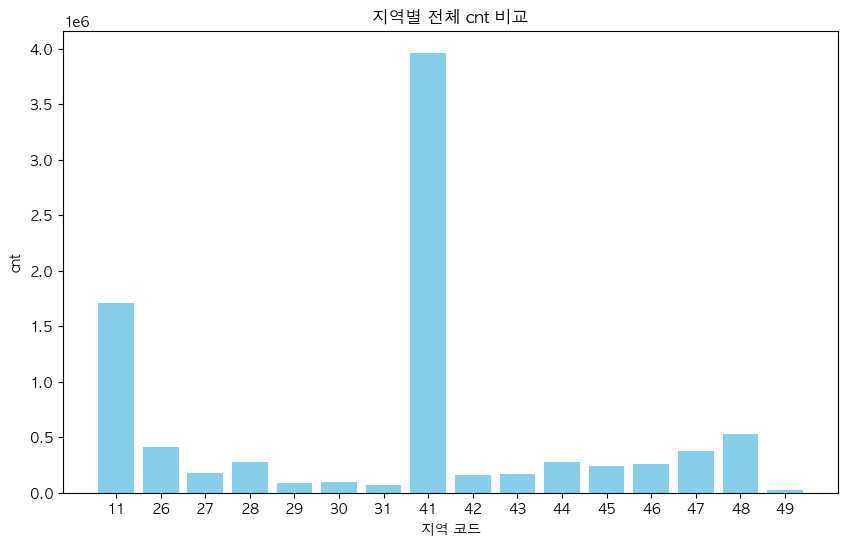

In [112]:
# 지역 코드에 따른 cnt 합산
import matplotlib.pyplot as plt
grouped_df = combined_df.groupby('znCd')['cnt'].sum().reset_index()


# 데이터 준비
znCd = grouped_df['znCd']
cnt = grouped_df['cnt']

# 바 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(znCd, cnt, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title('지역별 전체 cnt 비교')
plt.xlabel('지역 코드')
plt.ylabel('cnt')

# x축 눈금 라벨 설정
plt.xticks(znCd)

# 그래프 표시
plt.show()


   znCd dissCd      cnt
0    11      1   218477
1    11      2    19557
2    11      3  1445067
3    11      5    25281
4    26      1    80766
..  ...    ...      ...
59   48      5     9374
60   49      1    13153
61   49      2     1451
62   49      3     9147
63   49      5     1328

[64 rows x 3 columns]


findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' 

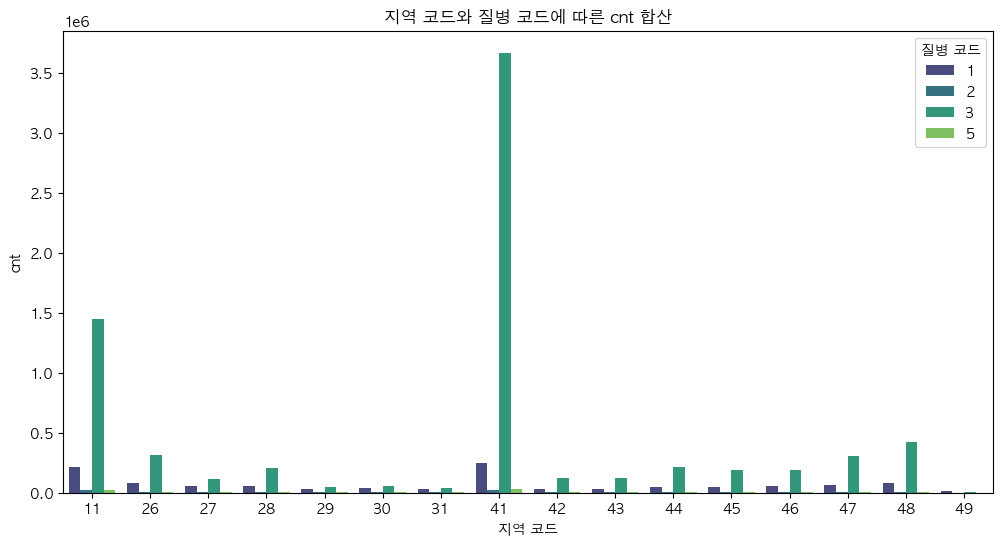

In [113]:
# 지역 코드와 질병 코드에 따른 cnt 합산
grouped_df = combined_df.groupby(['znCd', 'dissCd'])['cnt'].sum().reset_index()

# 결과 확인
print(grouped_df)

import matplotlib.pyplot as plt
import seaborn as sns

# 바 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_df, x='znCd', y='cnt', hue='dissCd', palette='viridis')

# 그래프 제목 및 축 레이블 설정
plt.title('지역 코드와 질병 코드에 따른 cnt 합산')
plt.xlabel('지역 코드')
plt.ylabel('cnt')

# 그래프 표시
plt.legend(title='질병 코드')
plt.show()



## 지역별 질병의 risk 비율 구해보기

### 식중독 risk 분포

findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' 

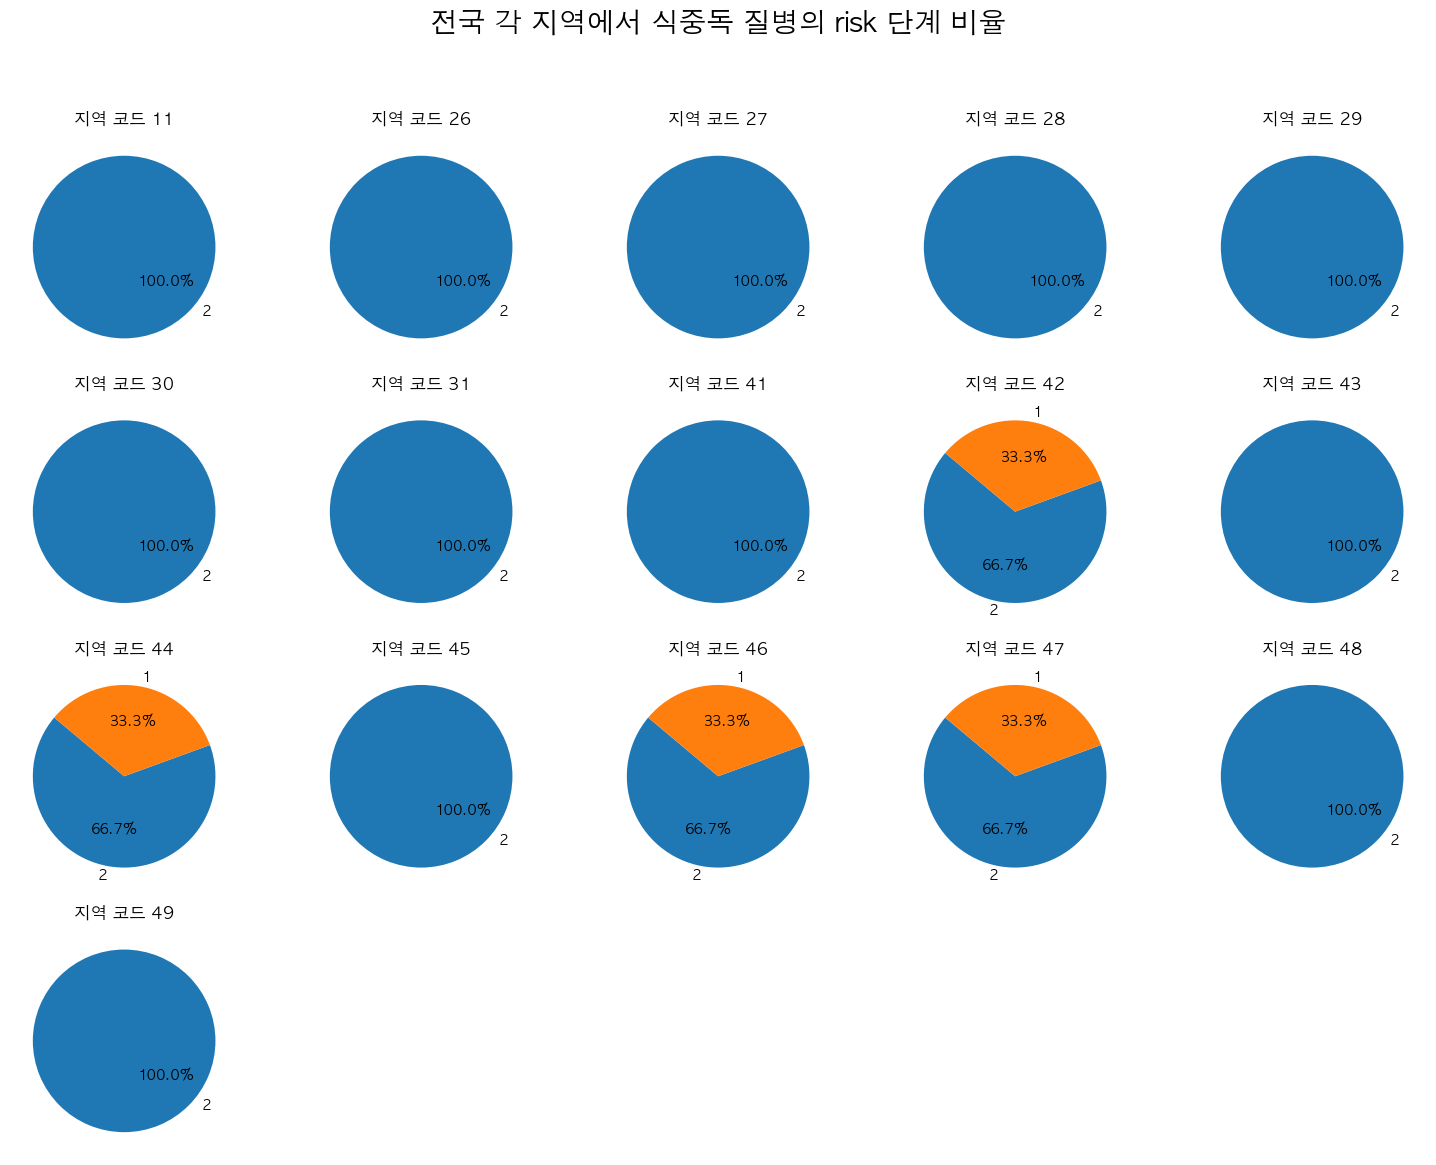

In [108]:
import matplotlib.pyplot as plt

# 전체 그래프의 행과 열 개수 설정
num_rows = 5
num_cols = 5

# 전체 그래프의 사이즈 설정
plt.figure(figsize=(15, 15))

# 전체 그래프의 제목 설정
plt.suptitle('전국 각 지역에서 식중독 질병의 risk 단계 비율', fontsize=20)

# 각 지역별로 파이 그래프 그리기
for i, region_code in enumerate(region_codes):
    # 조건에 해당하는 데이터 필터링 (각 지역 코드에 해당하는 데이터)
    filtered_df = combined_df[(combined_df['znCd'] == region_code) & (combined_df['dissCd'] == '3')]

    # risk 단계에 대한 전체 비율 계산
    risk_counts = filtered_df['risk'].value_counts(normalize=True) * 100

    # 각 지역별 그래프를 그리기 위한 서브플롯 설정
    plt.subplot(num_rows, num_cols, i + 1)

    # 파이 그래프 그리기
    plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'지역 코드 {region_code}')

# 그래프 간의 간격 조절
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# 그래프 표시
plt.show()


### 감기 risk 분포

findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' 

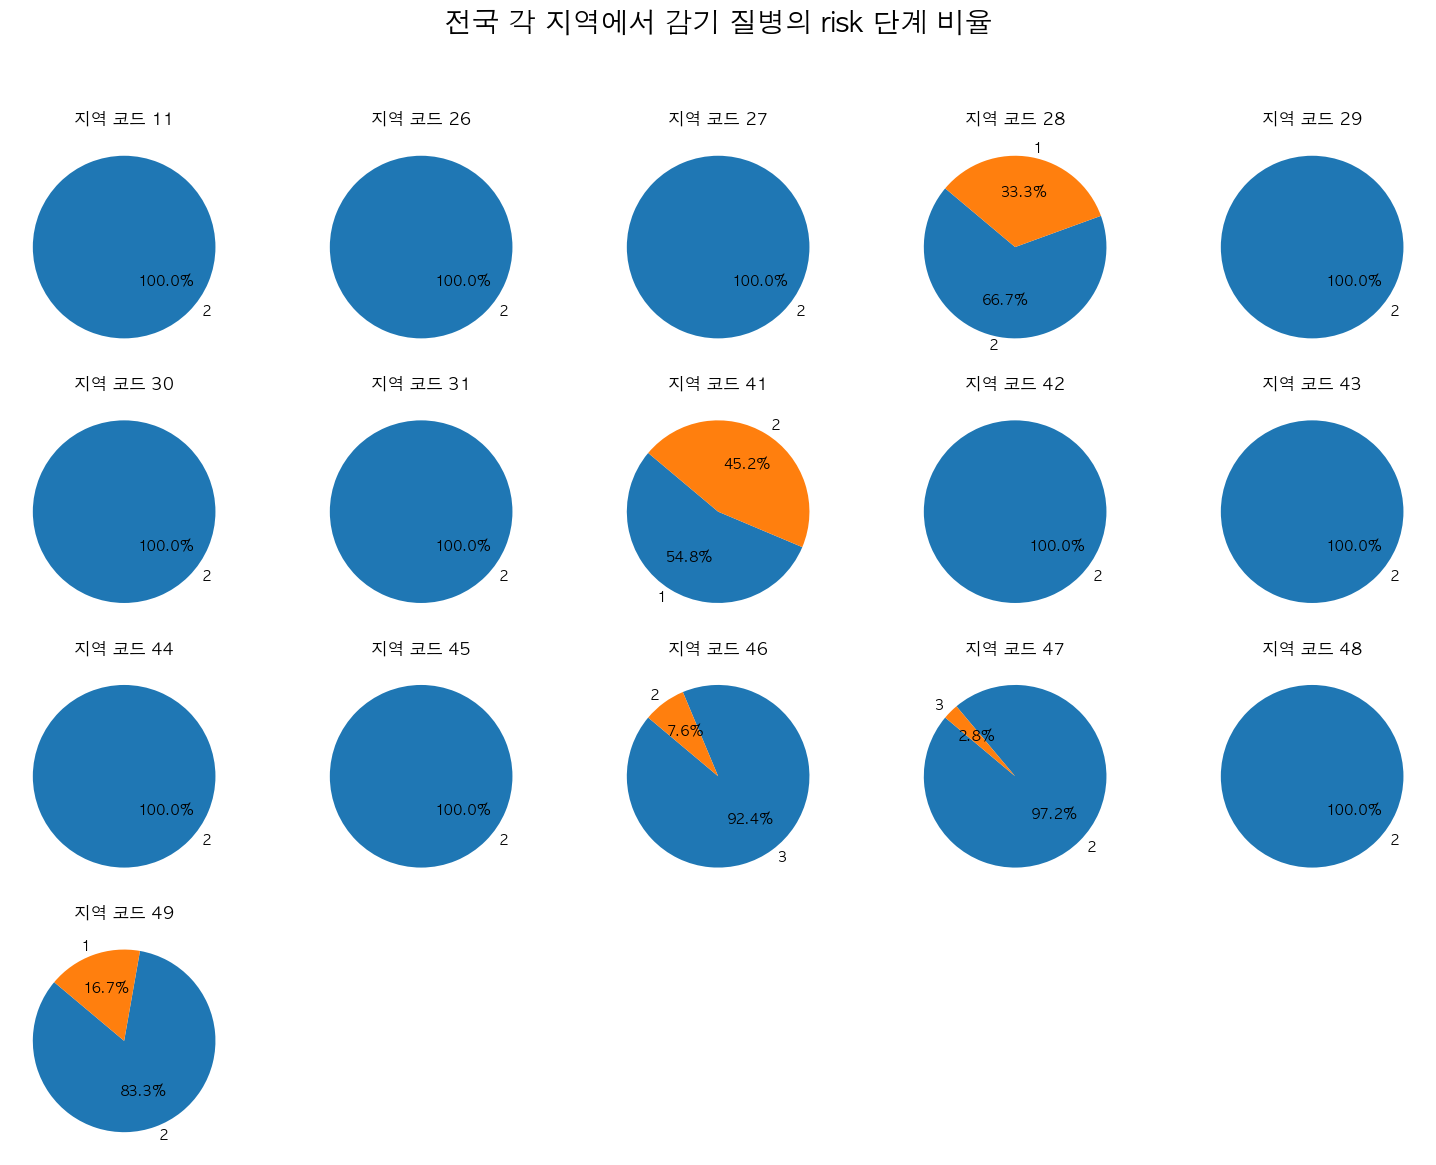

In [109]:
import matplotlib.pyplot as plt

# 전체 그래프의 행과 열 개수 설정
num_rows = 5
num_cols = 5

# 전체 그래프의 사이즈 설정
plt.figure(figsize=(15, 15))

# 전체 그래프의 제목 설정
plt.suptitle('전국 각 지역에서 감기 질병의 risk 단계 비율', fontsize=20)

# 각 지역별로 파이 그래프 그리기
for i, region_code in enumerate(region_codes):
    # 조건에 해당하는 데이터 필터링 (각 지역 코드에 해당하는 데이터)
    filtered_df = combined_df[(combined_df['znCd'] == region_code) & (combined_df['dissCd'] == '1')]

    # risk 단계에 대한 전체 비율 계산
    risk_counts = filtered_df['risk'].value_counts(normalize=True) * 100

    # 각 지역별 그래프를 그리기 위한 서브플롯 설정
    plt.subplot(num_rows, num_cols, i + 1)

    # 파이 그래프 그리기
    plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'지역 코드 {region_code}')

# 그래프 간의 간격 조절
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# 그래프 표시
plt.show()


### 눈병 risk 분포

findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' 

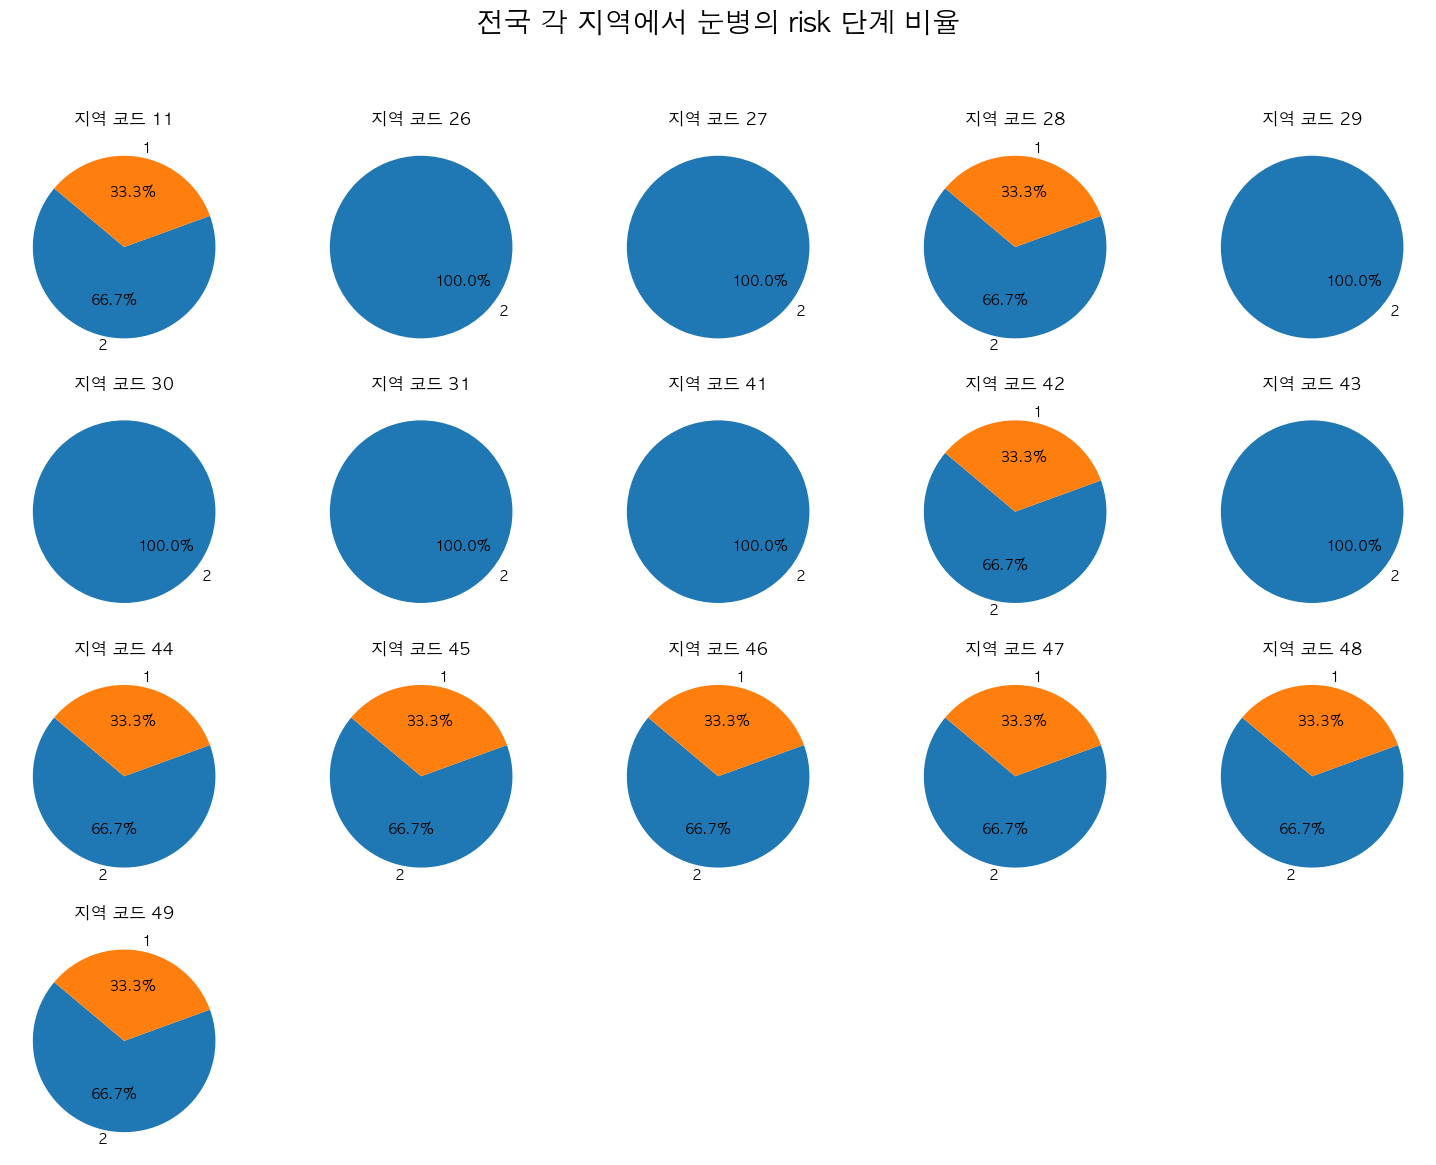

In [110]:
import matplotlib.pyplot as plt

# 전체 그래프의 행과 열 개수 설정
num_rows = 5
num_cols = 5

# 전체 그래프의 사이즈 설정
plt.figure(figsize=(15, 15))

# 전체 그래프의 제목 설정
plt.suptitle('전국 각 지역에서 눈병의 risk 단계 비율', fontsize=20)

# 각 지역별로 파이 그래프 그리기
for i, region_code in enumerate(region_codes):
    # 조건에 해당하는 데이터 필터링 (각 지역 코드에 해당하는 데이터)
    filtered_df = combined_df[(combined_df['znCd'] == region_code) & (combined_df['dissCd'] == '2')]

    # risk 단계에 대한 전체 비율 계산
    risk_counts = filtered_df['risk'].value_counts(normalize=True) * 100

    # 각 지역별 그래프를 그리기 위한 서브플롯 설정
    plt.subplot(num_rows, num_cols, i + 1)

    # 파이 그래프 그리기
    plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'지역 코드 {region_code}')

# 그래프 간의 간격 조절
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# 그래프 표시
plt.show()


### 피부병 risk 분포

findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'NanumSquareOTFRegular' 

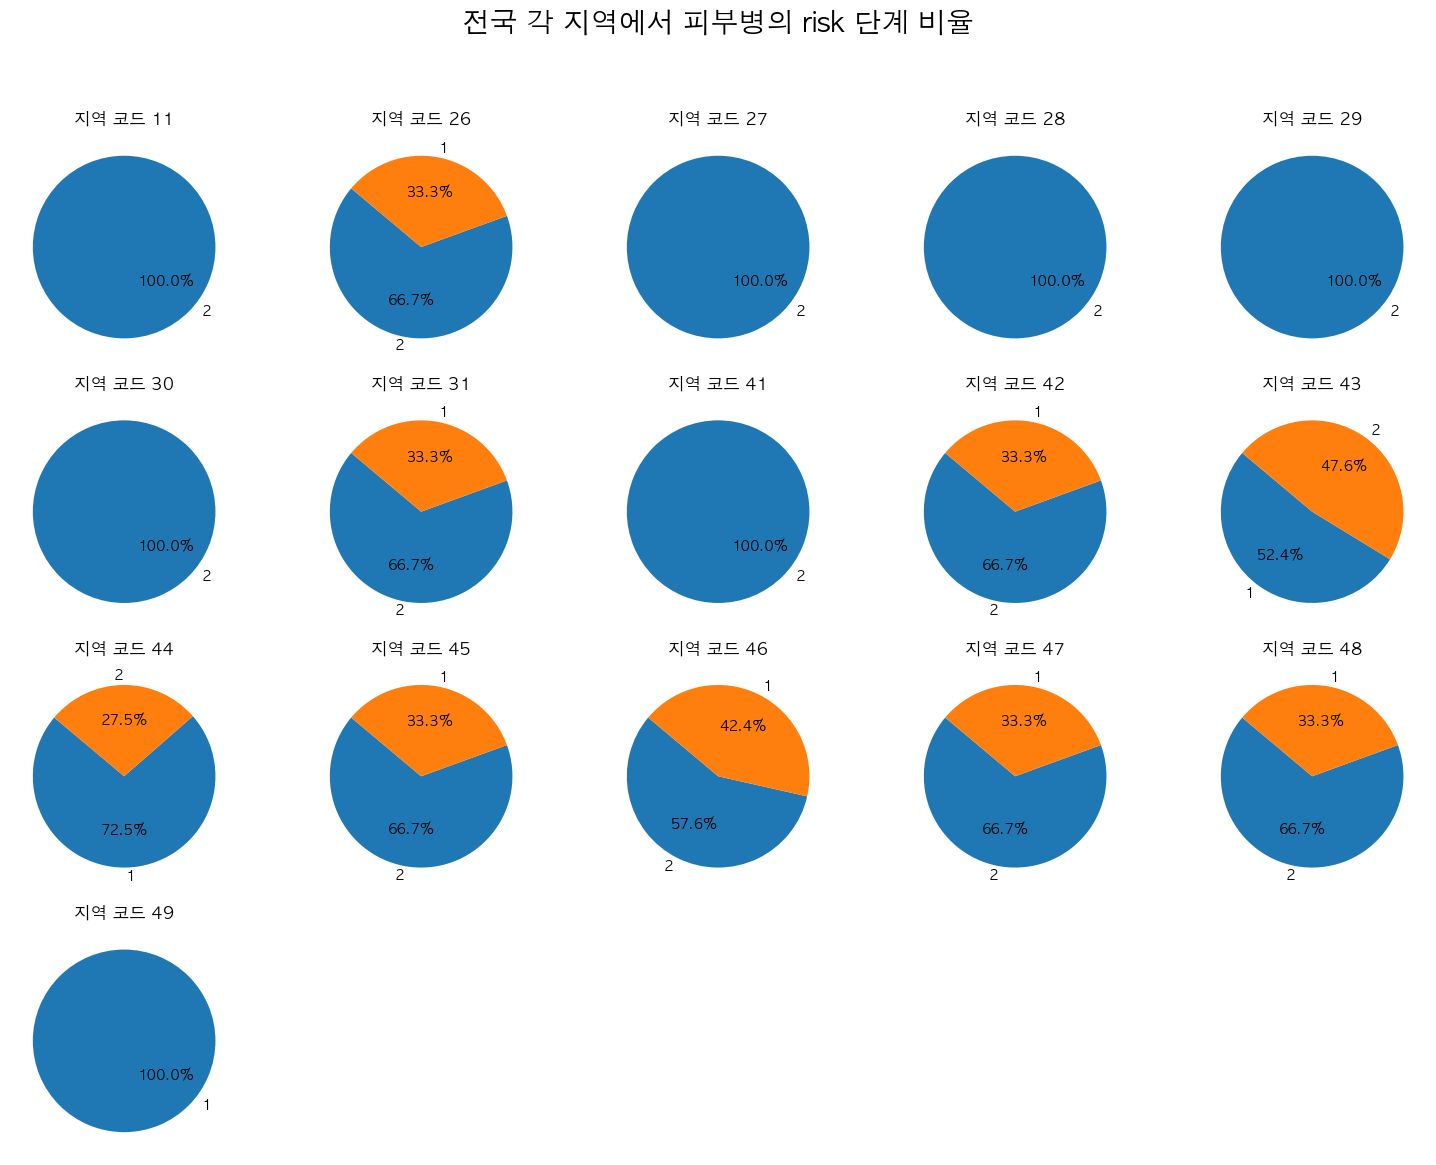

In [114]:
import matplotlib.pyplot as plt

# 전체 그래프의 행과 열 개수 설정
num_rows = 5
num_cols = 5

# 전체 그래프의 사이즈 설정
plt.figure(figsize=(15, 15))

# 전체 그래프의 제목 설정
plt.suptitle('전국 각 지역에서 피부병의 risk 단계 비율', fontsize=20)

# 각 지역별로 파이 그래프 그리기
for i, region_code in enumerate(region_codes):
    # 조건에 해당하는 데이터 필터링 (각 지역 코드에 해당하는 데이터)
    filtered_df = combined_df[(combined_df['znCd'] == region_code) & (combined_df['dissCd'] == '5')]

    # risk 단계에 대한 전체 비율 계산
    risk_counts = filtered_df['risk'].value_counts(normalize=True) * 100

    # 각 지역별 그래프를 그리기 위한 서브플롯 설정
    plt.subplot(num_rows, num_cols, i + 1)

    # 파이 그래프 그리기
    plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'지역 코드 {region_code}')

# 그래프 간의 간격 조절
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# 그래프 표시
plt.show()


#dissCD : 질병코드
# 1 - 감기 / 2-눈명  / 3-식중독 / 5-피부염
#dt : 예측일자
#znCd : 지역코드
# 11 - 서울 / 26 - 부산 / 27 - 대구 / 28-인천 / 29-광주 / 30-대전/ 31-울산 / 41-경기 / 42-강원 / 43-충북 / 44-충남 / 45 - 전북 / 46 - 전남 / 47 - 경북 / 48-경남 / 49-제주 / 99- 전국
#lowrnkZnCd : 하위 지역코드
#cnt : 질병 예측 진료 건수
#risk : 질병 예측위험도
#1 - 관심 / 2-주의 / 3-경고 / 4- 위험
#dissRiskXpin : 질병 위험도 지침